In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv('data/DATA_DQPT_N=2_alpha=05_h=06465.txt',names=['x1','x2','dqpt'])
data

,x1,x2,dqpt
0,0.000000,0.000000,1
1,0.063467,0.000000,1
2,0.126933,0.000000,1
3,0.190400,0.000000,1
4,0.253866,0.000000,1
...,...,...,...
9995,6.029319,3.141593,1
9996,6.092786,3.141593,1
9997,6.156252,3.141593,1
9998,6.219719,3.141593,1


## Descripción de la data

In [118]:
data.describe()

,x1,x2,dqpt
count,10000.000000,10000.000000,10000.000000
mean,3.141593,1.570796,-0.072800
std,1.832121,0.916060,0.997396
min,0.000000,0.000000,-1.000000
25%,1.570796,0.785398,-1.000000
50%,3.141593,1.570796,-1.000000
75%,4.712389,2.356194,1.000000
max,6.283185,3.141593,1.000000


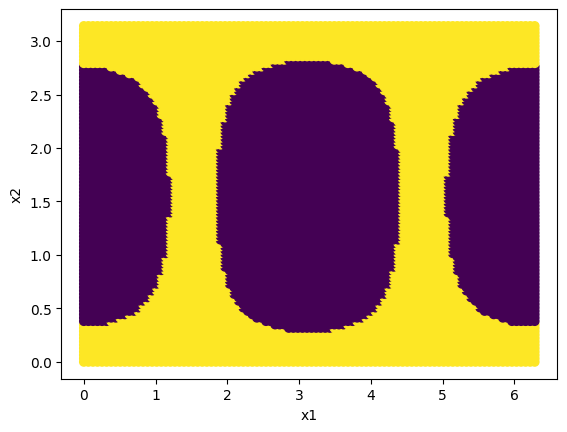

In [119]:
#plot data x1 in axis x and x2 in axis y and color by dqpt
plt.scatter(data['x1'],data['x2'],c=data['dqpt'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


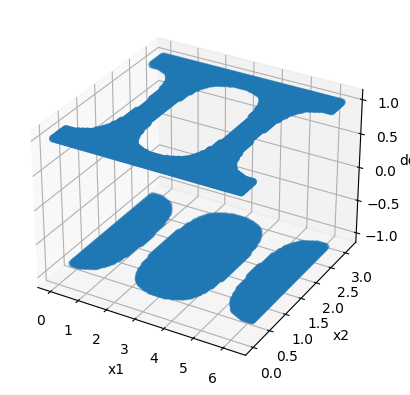

In [120]:
#plot in 3d the data like before but with the axis z as dqpt value 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'],data['x2'],data['dqpt'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('dqpt')
plt.show()



In [121]:
data['dqpt'].value_counts()

dqpt
-1    5364
 1    4636
Name: count, dtype: int64

In [122]:
data

,x1,x2,dqpt
0,0.000000,0.000000,1
1,0.063467,0.000000,1
2,0.126933,0.000000,1
3,0.190400,0.000000,1
4,0.253866,0.000000,1
...,...,...,...
9995,6.029319,3.141593,1
9996,6.092786,3.141593,1
9997,6.156252,3.141593,1
9998,6.219719,3.141593,1


In [123]:
# data.loc[:, 'multiplier'] = data['x1'] * data['x2']
# data

In [124]:
train_set, test_set = train_test_split(data,test_size = 0.4)

In [125]:
x_train = train_set.drop('dqpt',axis=1)
y_train = train_set['dqpt']
x_test = test_set.drop('dqpt',axis=1)
y_test = test_set['dqpt']


In [141]:
len(x_train)

6000

<Axes: >

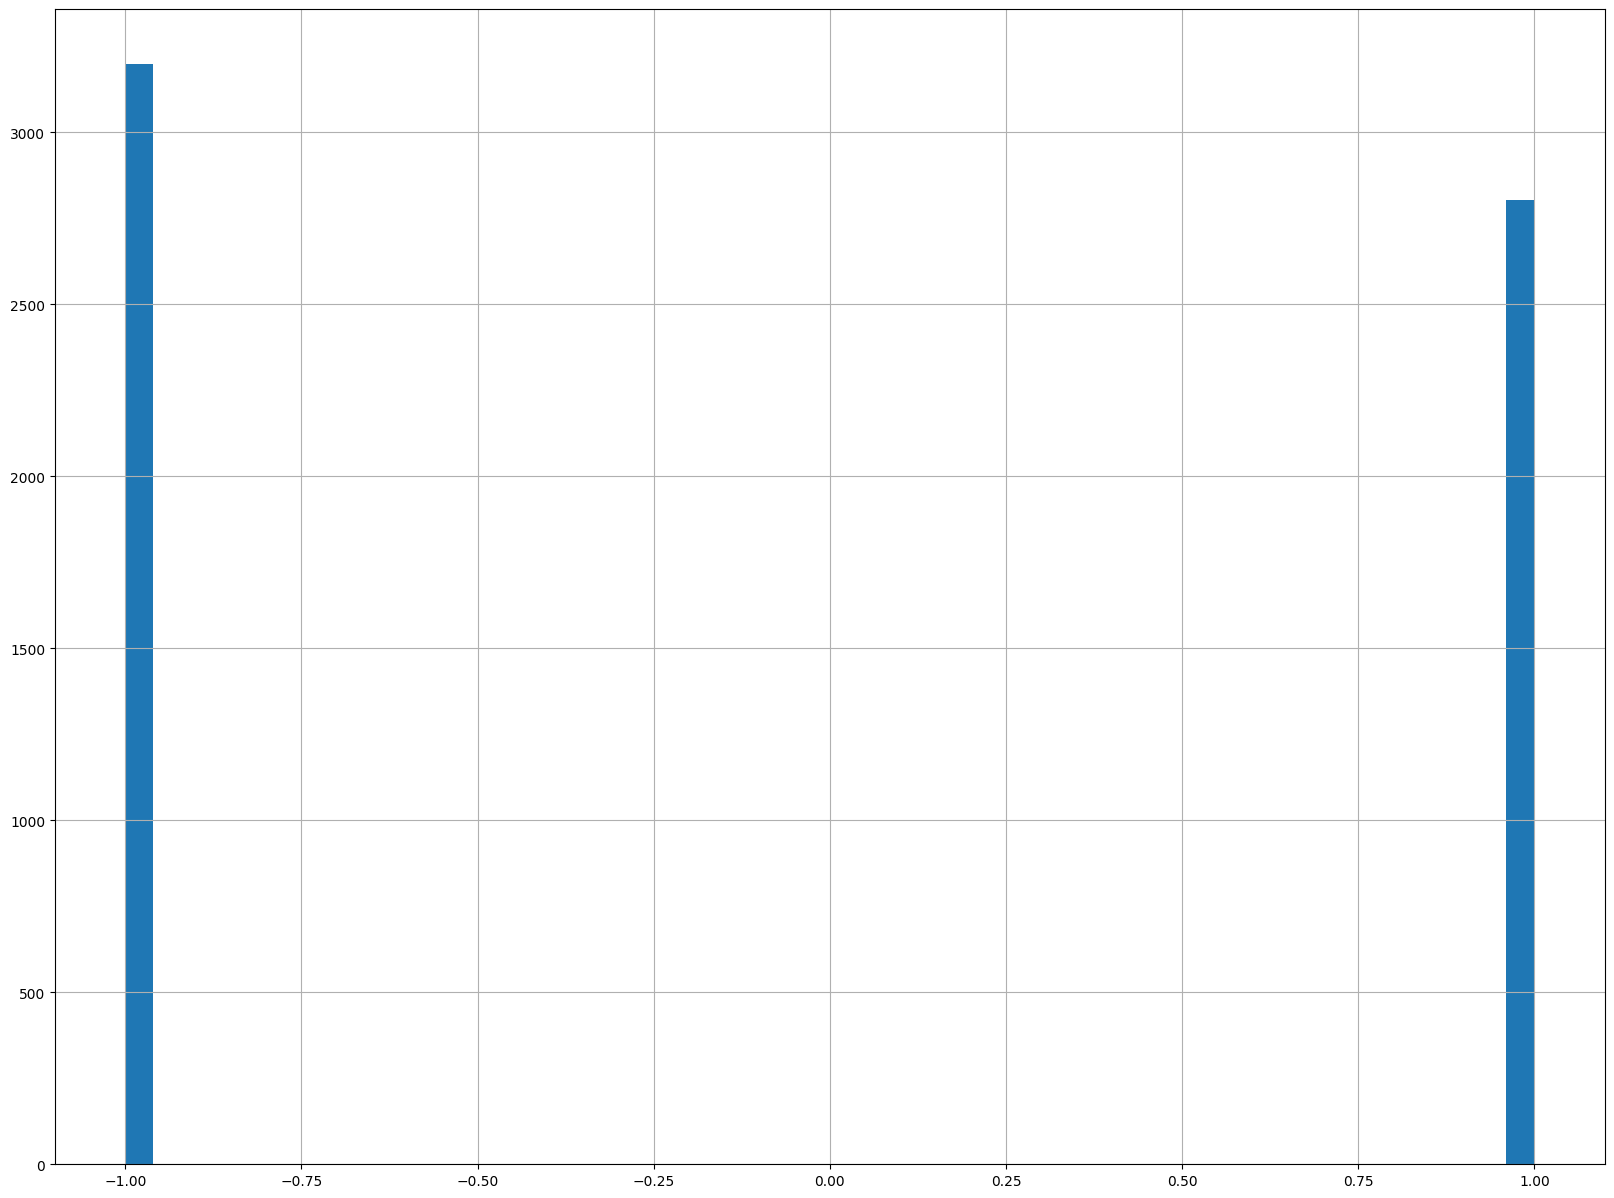

In [126]:
y_train.hist( bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

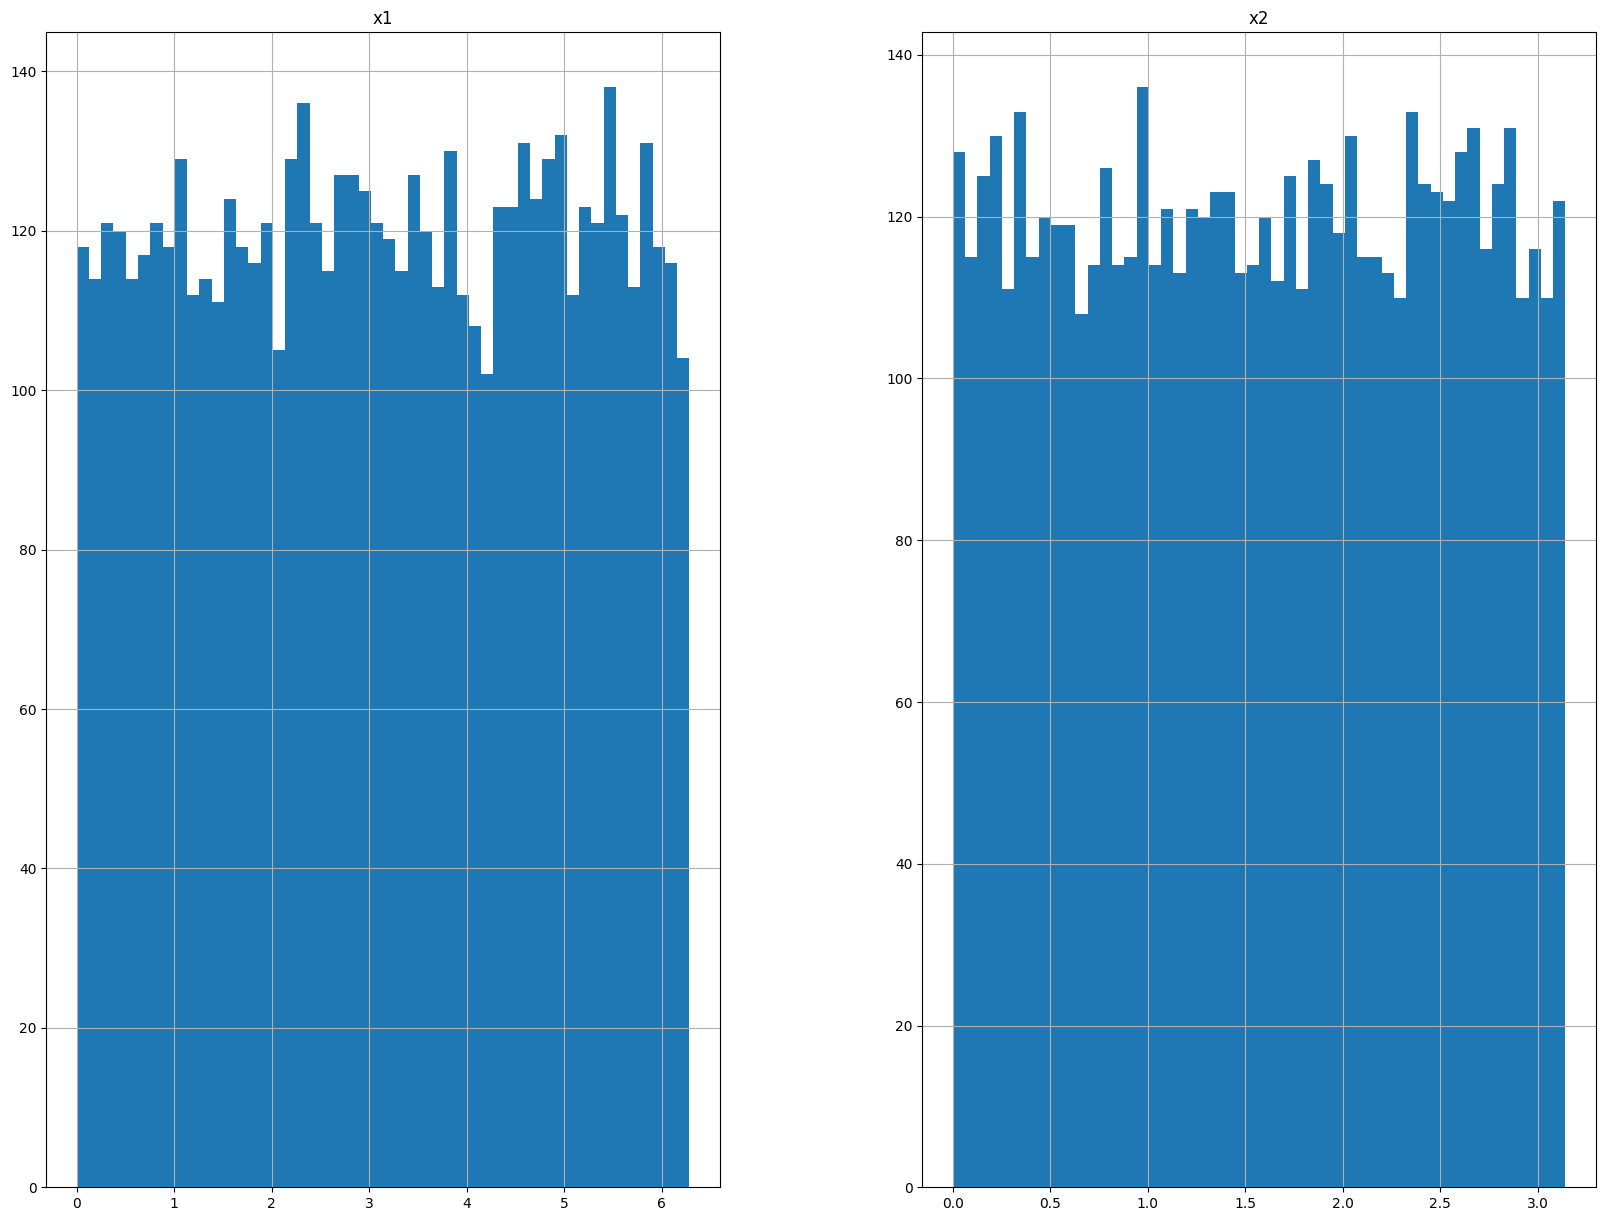

In [127]:
x_train.hist( bins=50, figsize=(20,15))

In [128]:
model = SVC(kernel="rbf", probability=True)
model.fit(x_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# lgbm = LGBMRegressor()
# lgbm.fit(x_train, y_train)

RandomForestClassifier()

In [129]:
rf_prediction = rf_model.predict(x_test)
rfscore = accuracy_score(y_test, rf_prediction)

prediction = model.predict(x_test)
score = accuracy_score(y_test, prediction)

# lg_prediction = lgbm.predict(x_test)
# lg_score = accuracy_score(y_test, lg_prediction)

print('% prediction: ', score)
print('% rf_prediction: ', rfscore)
# print('% lg_prediction: ', lg_score)

% prediction:  0.92075
% rf_prediction:  0.9885


First pred

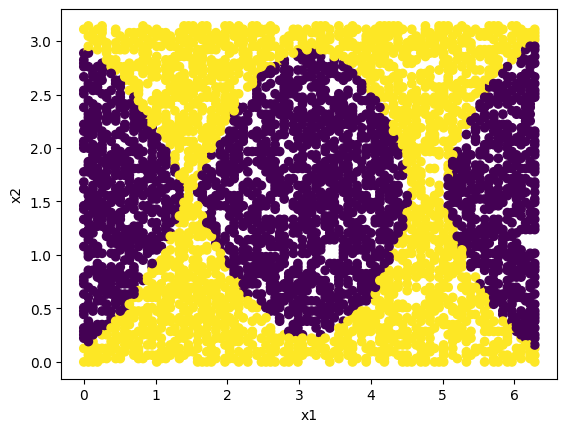

In [130]:
plt.scatter(x_test['x1'],x_test['x2'],c=prediction)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


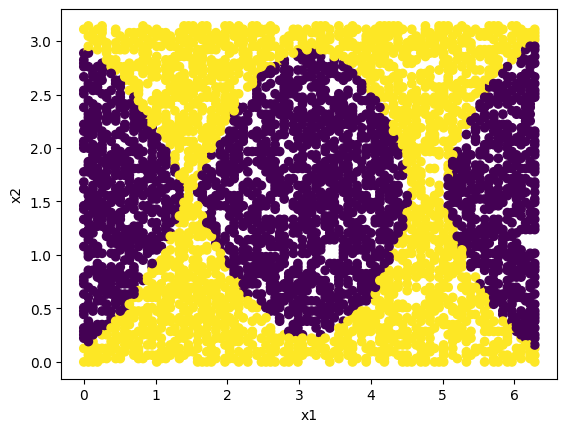

In [131]:
plt.scatter(x_test['x1'],x_test['x2'],c=prediction)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [132]:
points_C = 1000
Cf = 10
score =np.zeros(points_C)
c=np.linspace(1e-3,Cf,points_C)
ypred = 0
for i in range(0,points_C):
    svm = SVC(kernel="rbf", C = c[i]).fit(x_train, y_train)     
    rf = RandomForestClassifier().fit(x_train, y_train) 
    rf_ypred = rf.predict(x_test)
    ypred = svm.predict(x_test)  
    

    score[i] = accuracy_score(y_test, ypred)


index = np.argmax(score)
c_max = c[index]
print('score test max =', score[index])
print('C_max = ', c[index])

score test max = 0.95875
C_max =  9.969972972972974


Text(0, 0.5, 'Score')

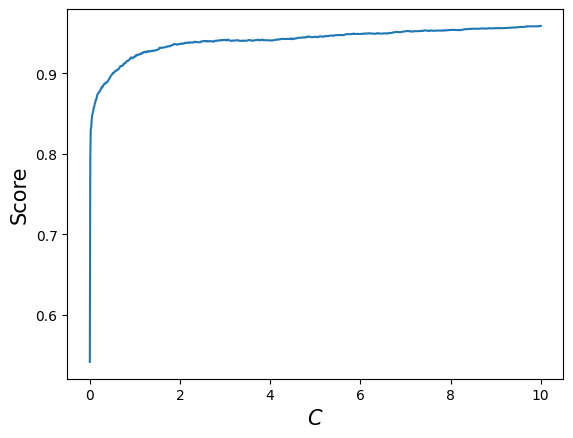

In [133]:
plt.plot(c,score)
plt.xlabel(r'$C$',fontsize = 15)
plt.ylabel(r'Score',fontsize = 15)

In [134]:
# def objective(trial):
#     C = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
#     model = SVC(C=C, kernel="rbf", probability=True)
#     score = cross_val_score(model, x_train, y_train, n_jobs=-1, cv=3)
#     accuracy = score.mean()
#     return accuracy

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)
# print(study.best_trial)

In [135]:
ypred

array([-1, -1,  1, ...,  1,  1, -1])

In [136]:
f1_score(y_test,prediction,average='weighted')

0.9208343219607125

In [137]:
precision_score(y_test,ypred, average='weighted')

0.9596026161754581

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>],
       [<Axes: title={'center': 'dqpt'}>, <Axes: >]], dtype=object)

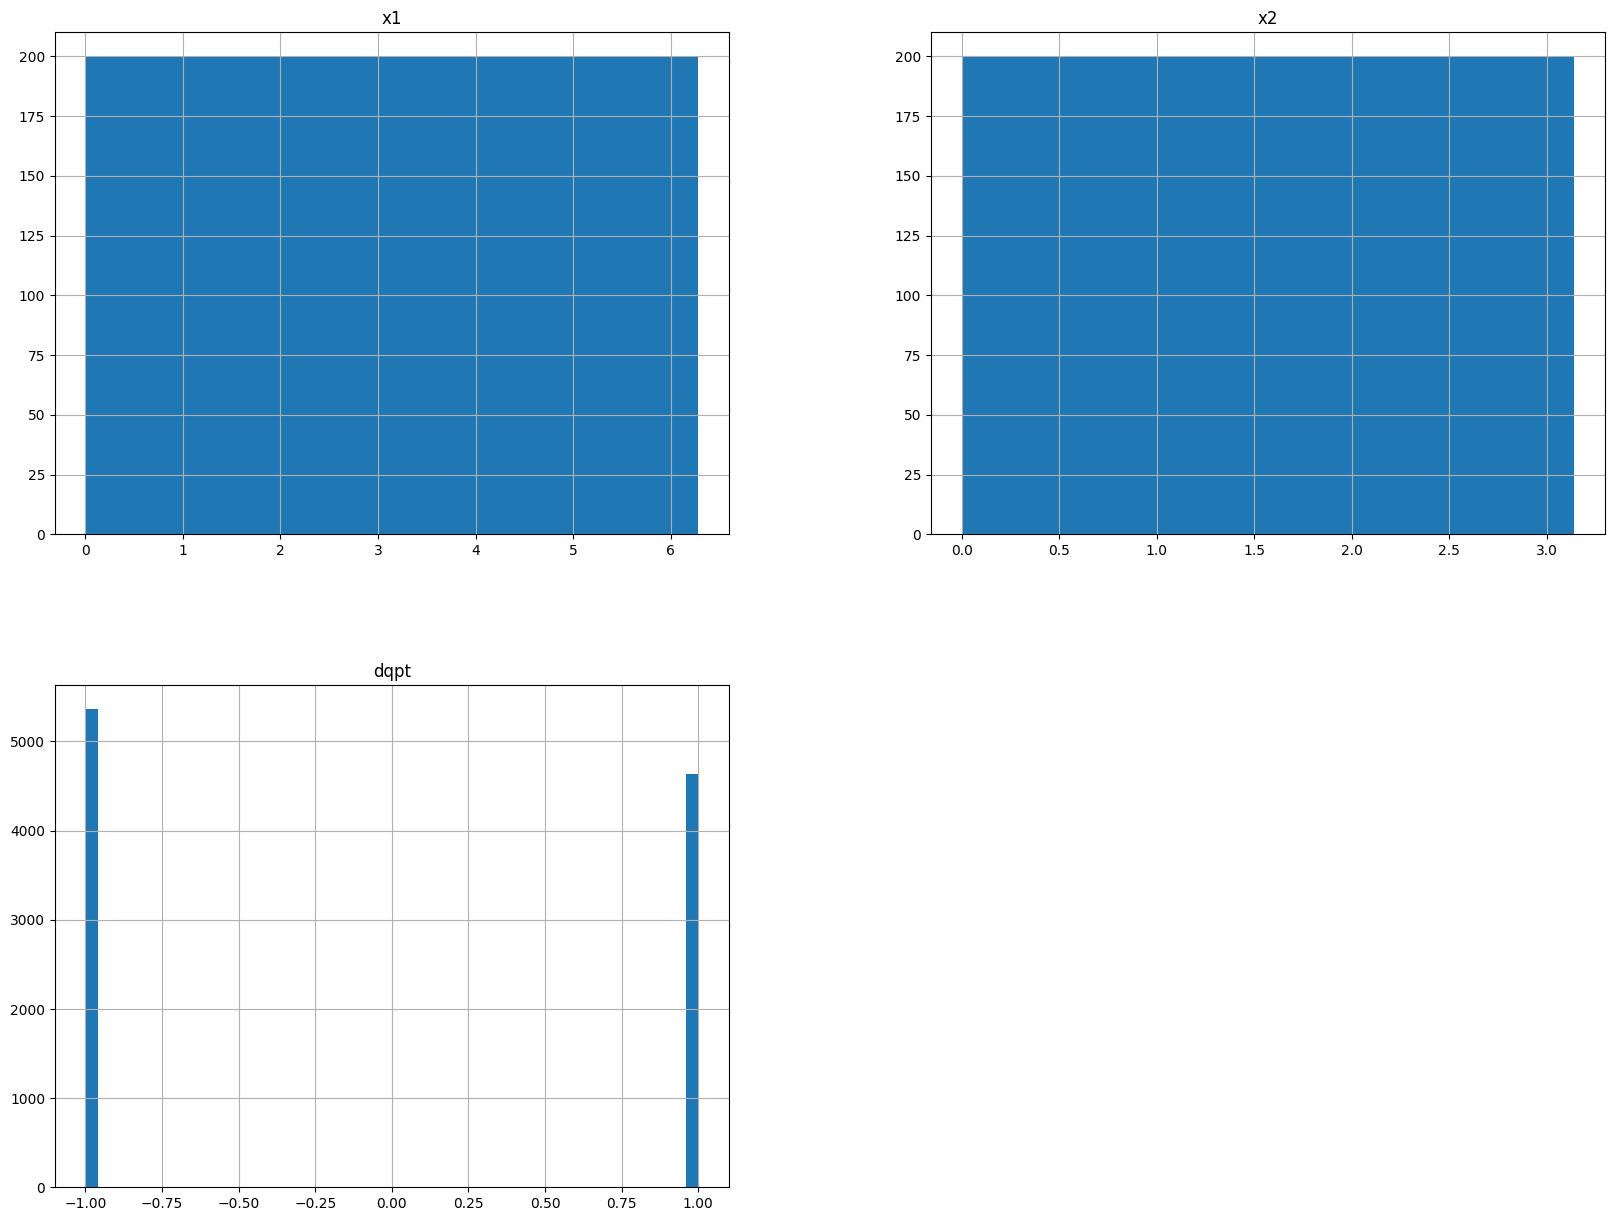

In [138]:
data.hist( bins=50, figsize=(20,15))

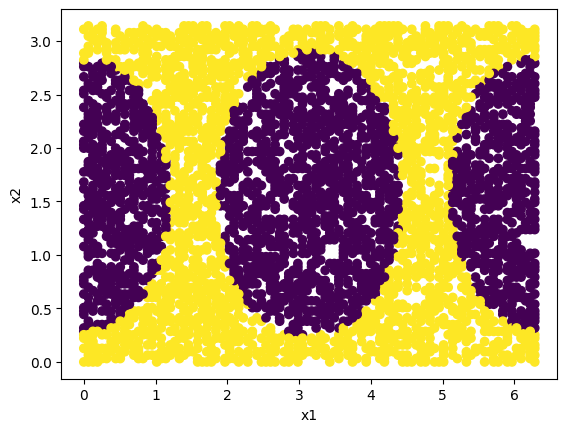

In [139]:
# plot data x1 in axis x and x2 in axis y and color by dqpt with predictions and test values 
plt.scatter(x_test['x1'],x_test['x2'],c=ypred)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()



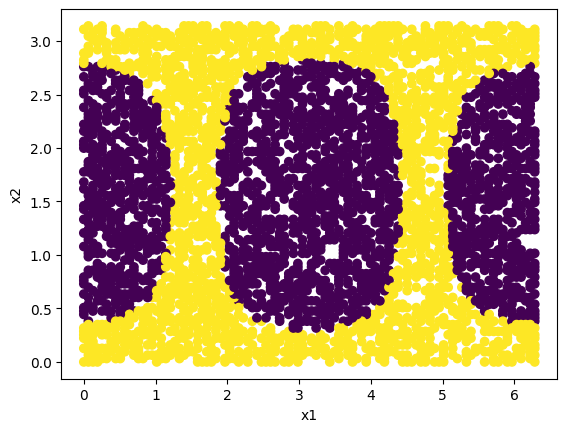

In [140]:
#plot the same but with the test values but in sphete form
plt.scatter(x_test['x1'],x_test['x2'],c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
